In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import root

 ## 문제 1.

다음 변수를 이용하여 주식들이 CAPM 균형수익률을 감안했을 때 저평가되었는지 고평가되었는지 적정수준인지를 계산하시오. (젠센의알파를 감안하시오.)

rf = 0.02, 
rm = 0.07

samsung = {'name' : 'samsung', 'Covariance to Market' : 0.054 , 'realized_return' : 0.09, 'sigma' : 0.2}

lg = {'name' :'lg', 'Covariance to Market' : 0.078125 , 'realized_return' : 0.825, 'sigma' :0.25}

kt = {'name' :'kt', 'Covariance to Market' : 0.018 , 'realized_return' : 0.05, 'sigma' : 0.15}

stock_info = [samsung, lg, kt]

In [2]:
rf, rm = 0.02, 0.07
samsung = {'name' : 'samsung', 'Covariance to Market' : 0.054 , 
           'realized_return' : 0.09, 'sigma':0.2}
lg = {'name' :'lg', 'Covariance to Market' : 0.078125 , 
      'realized_return' : 0.0825,'sigma':0.25}
kt = {'name' :'kt', 'Covariance to Market' : 0.018 , 
      'realized_return' : 0.05,'sigma':0.15}
stock_info = [samsung, lg, kt]

 ### 문제 2.
회사의 T시점의 Asset Value는 다음과 같다.
$$
 \begin{align}
A(T) = A_0 e^{ (r-\frac{\sigma^2}{2})T + \sigma \sqrt{T} \epsilon} \\
\epsilon \sim N(0,1)
\end{align}
$$ 

현재 자산가치는 100이며,T시점의 회사의 가치가 부채의 Face Value 보다 낮으면 파산한다.

이 회사부채의 FaceValue는 현재 전체 자산가치 대비 70%이다. 부채는 모두 제로쿠폰채라고가정하자.

10000번의 시뮬레이션을 통해 회사가 몇 번 파산하는지 파산확률을 계산하시오.

(반복문을 사용하지 마시오.)
$$
 A_0 = 100,\ \sigma_A = 0.15,\ T = 2,\ r = 0.05
 $$

In [3]:
A_0 = 100
r = 0.05
sigma = 0.15
T = 2
simul_num = 10000
Debt_to_Asset = 0.7
##################
## 풀이과정   ####

 ### 문제 3.
기초자산가격이 100원이고 변동성은 0.2 만기가 1년 이자율은 2%라고 가정하자.

두 개의 콜 옵션이 있다.

하나는 행사가격이 90원이고 하나는 행사가격이 110원이다.

강세 콜 스프레드 전략(bull call spread strategy)을 시행하고자 한다, 

현재 옵션을 매수,매도하여 포지션을 취했을 때, 현금이 얼마만큼 남거나 부족한가?

콜옵션 가격은 블랙숄즈 콜옵션 가격과 같다.

In [5]:
S0, K1, K2, sigma, T, r = 100, 90, 110, 0.2, 1, 0.02

In [6]:
def Call(S,K,sigma,T,r) :
    ##################
    ## 풀이과정   ####
    return C

 ## 문제 4.
 
무이표채의 할인율 커브인 Zero Rate Curve 가 1년 0.02, 2년 0.025 , 3년 0.03으로 우상향한다.
 
 $$
 r_{(0,1)}\ =\ 0.02 ,\ r_{(0,2)}\ =\ 0.025 ,\ r_{(0,3)}\ =\ 0.03
 $$
 
 다음 Zero_Bond 함수를 이용해서 쿠폰이자율이 2%이고 만기가 3년, 액면이 100인 쿠폰채권의 가치를 계산하는 함수를 구현하시오.
 
 반복문을 사용하지 말고 numpy를 사용하시오.

In [9]:
FV = 100
coupon_rate = 0.02
T = 3
r_curve = np.array([0.02, 0.025,0.03])

In [10]:
def Zero_Bond(r, T, FV = 100) :
    return FV/(1+r)**T

def Coupon_Bond(r_curve, T, FV = 100) :
    t_range = np.arange(1,T + 1)
    ##################
    ## 풀이과정   ####
    return PV_of_FV + PV_of_Coupon

In [11]:
Coupon_Bond(r_curve, T, FV)

97.20886236013325

 ## 문제 5.
 
 문제 4에서 계산한 채권가격이 97.21이라고 가정하자.
 
 다음 함수 Coupon_Bond_with_YTM 함수를 이용하여 Yield To Maturity 수익률을 계산해보시오.
 
 root 해찾기 모듈을 쓰면 된다. x0를 0.04로 설정하시오.

In [12]:
Price = 97.21
FV = 100
coupon_rate = 0.02

In [13]:
def Coupon_Bond_with_YTM(YTM, T,coupon_rate, FV = 100) :
    t_range = np.arange(1,T + 1)
    PV_of_Coupon = Zero_Bond(YTM, t_range, coupon_rate * FV).sum()
    PV_of_FV = Zero_Bond(YTM, t_range[-1], FV)
    return PV_of_FV + PV_of_Coupon

In [14]:
Coupon_Bond_with_YTM(0.03, T,coupon_rate, FV = 100)

97.17138864510532

In [15]:
def fun('변수입력') :
    ##################
    ## 풀이과정   ####
    return Coupon_Bond_with_YTM('변수입력') - Price
x0 = 0.04
x = root('변수입력')

In [17]:
YTM = x.x[0]
YTM

0.029860858610148474

## 문제 6.

다음은 코스피의 실제 세 종목 주가이다.

세 종목의 기대수익률은 각각 8%, 15%, 11%이다.

각각 투자비중을 20%, 30%, 50%로 가정할 때

6-1. 포트폴리오의 변동성을 구하시오.

6-2. 포트폴리오의 샤프비율을 계산하시오. (무위험이자율은 0을 가정하시오.)

6-3. 각 종목의 월수익률이 7%이상이거나 -2% 이하인 경우는 각 종목당 몇번 발생했는가? 

(수익률의 data_frame을 ret 이라고 변수를 설정하고 pandas 한줄 코드로 나타내시오.)

| Price|삼성전자|신풍제약|현대차|
|------|---|---|---|
|2020-02-28|	54200|	7360|	115000|
|2020-03-31|	47750|14400|	88700|
|2020-04-30|	50000|	16700|	93200|
|2020-05-31|	50700|	21700|	98000|
|2020-06-30|	52800|	30200|	97700|
|2020-07-31|	57900|	86000|	127500|
|2020-08-31|	54000|	136500|	176500|



In [45]:
expected_return = np.array([0.08,0.15,0.11])
A = [54200,47750,50000,50700,52800,57900,54000]
B = [7360,14400,16700,21700,30200,86000,136500]
C = [115000,88700,93200,98000,97700,127500,176500]
my_index = pd.date_range('2020-02-28','2020-08-31',freq = 'M')
w = np.array([0.2,0.3,0.5]).reshape(1,-1)
##################
## 풀이과정   ####

In [47]:
np.sqrt(w.dot(Cov).dot(w.T))

array([[0.24841455]])

 ## 문제 7.
 
 다음과 같은 이자율의 Binomial Tree를 만드시오.
 
 단 Node의 갯수는 6개를 가정하시오. (0~6기간까지 총 7,7개의 행렬)
 
 $$
 \begin{array}{c}
 r_0 = 0.08 , \sigma_r = 0.01
 \end{array}
 $$
 이다. 
 
 | r|0|1|2|3|
|------|---|---|---|---|
|0|	r0|	r0+sigma|	r0+2sigma|r0+3sigma|
|1|	NaN|r0-sigma|	r0|r0+sigma|
|2|	NaN|NaN|	r0-2sigma|r0-sigma|
|3|	NaN|NaN|	NaN|r0-3sigma|

 

In [56]:
N = 6
sigma= 0.01
r0 = 0.08

## 문제 8.

문제 8-1. 현재 시점은 2020년 5월 11일이다. 매월의 이자율을 계산하기 위해 monthly cubic interpolate하시오.

문제 8-2. 매월의 이자율을 기반으로 만기가 2020년 5월 30일부터 2028년 1월 31일까지 매 월의 제로쿠폰채의 가격을 계산하시오. (매월의 Day Count는 엄밀하게 계산하며 1년은 365일로 가정하시오.)

|만기|제로금리|
|------|---|
| '2020-05-12'|1.713 |
| '2020-06-17'|1.673 |
| '2020-09-16'|1.622 |
| '2020-12-16'|1.567 |
| '2021-03-17'|1.522 |
| '2021-06-16'|1.481 |
| '2021-09-15'|1.448 |
| '2022-02-14'|1.430 |
| '2023-02-13'|1.383 |
| '2024-02-12'|1.376 |
| '2025-02-12'|1.388 |
| '2026-02-12'|1.409 |
| '2027-02-12'|1.434 |
| '2028-02-14'|1.46 |

In [73]:
start_day = pd.to_datetime('2020-05-11')
end_day = pd.to_datetime('2028-01-31')
Zero_Rate = [1.713,1.673,1.622,1.567,1.522, 1.481,1.448,1.430,1.383,1.376,1.388,
            1.409,1.434,1.46]
Mat_Date = ['2020-05-12','2020-06-17','2020-09-16','2020-12-16','2021-03-17',
           '2021-06-16','2021-09-15','2022-02-14','2023-02-13','2024-02-12',
           '2025-02-12','2026-02-12','2027-02-12','2028-02-14']

In [85]:
##################
## 풀이과정   ####
PV = np.exp(-r_M * T)

 ## 문제 9.
 
문제 9-1. 현재 가격이 100원인 A주식과 B주식 C주식의 연 변동성은 각각 10%, 62%, 22%이고 상관계수행렬은 다음과 같다.

| Price|A|B|C|
|------|---|---|---|
|A|	1.000000|	0.176099|	0.366461|
|B|	0.176099|	1.000000|	0.284950|
|C|	0.366461|	0.284950|	1.000000|

무위험 수익률 5%를 가정하고 252일(1년) 동안 위험중립 주가 시뮬레이션 1회 실시하시오. 
  A, B, C의 주가 Path를 하나의 데이터 프레임으로 나타내고 그래프를 나타내시오.

문제 9-2. 500원을 가지고 A 주식에 30%, B 주식에 30%, C 주식에 40% 투자할 때 포트폴리오의 총 가치를 계산하고. 포트폴리오 총 가치 1회 시뮬레이션 결과에 있어서 252일동안 95%신뢰수준, 1day기준 Value at Risk와 Expected Shortfall을 계산하시오. 

[]

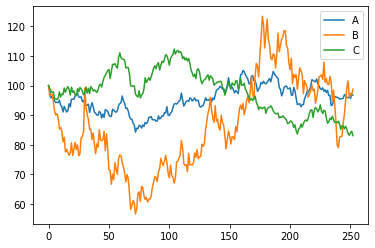

In [94]:
r , S1, S2, S3 = 0.05, 100, 100, 100
T , deltaT = 1 , 1/252
sig1, sig2,sig3 = 0.2, 0.62 , 0.22
corr = np.array([[1, 0.176, 0.366],[0.176,1,0.285],[0.366, 0.285, 1]])
##################
## 풀이과정   ####

In [95]:
#############################
##풀이과정을 여기에 쓰세요 ##
#############################
initial_money = 500
ABC_money = initial_money * np.array([0.3, 0.3,0.4]).reshape(1,-1)
##################
## 풀이과정   ####
print('VaR(95%) = ',VaR95,'\nES(95%) = ',ES95)
#############################

VaR(95%) =  -0.024636108804790537 
ES(95%) =  -0.029243157791353534


 ##  문제 10. 
 
 다음 데이터프레임(df)에서 맨윗줄 
 
 [Random01,Random01,Random01,Random01,Random01, Random48,Random48,Random48,Random48,Random48] columns를 뽑아내시오. 
 

In [2]:
big_col = ['Random01'] * 5 + ['Random48'] * 5
small_col = ['A','B','C','D','E']*2
Random01 = np.random.normal(0,1,size = (5,5))
Random48 = np.random.normal(4,8,size = (5,5))
df1 = pd.DataFrame(Random01)
df2 = pd.DataFrame(Random48)
df = pd.concat([df1,df2],axis = 1)
df.columns = [big_col , small_col]

In [3]:
##################
## 풀이과정   ####

Index(['A', 'B', 'C', 'D', 'E', 'A', 'B', 'C', 'D', 'E'], dtype='object')

 ## 문제 11.
 
 다음 데이터프레임(df2)은 총자본을 의미한다.
 
 df2의 값들을 float형식으로 나타내시오. 자본 값이 완전잠식으로 나타난다면 NaN으로 처리하시오.
 
 | |A|B|
|------|---|---|
|2020-03-31|	'12,500'|	'200'|	
|2020-06-30|	'13,300'|'완전잠식'|	
|2020-09-30|	'13,200'|	'100|

In [4]:
df2 = pd.DataFrame([['12,500','200'],['13,300','완전잠식'],['13,200','100']], 
                   index = pd.to_datetime(['2020-03-31','2020-06-30','2020-09-30']), columns = ['A','B'])
df2

,A,B
2020-03-31,"12,500",200
2020-06-30,"13,300",완전잠식
2020-09-30,"13,200",100


In [5]:
##################
## 풀이과정   ####

,A,B
2020-03-31,12500,200
2020-06-30,13300,NaN
2020-09-30,13200,100
